In [202]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/按日期单品合并.csv",encoding='utf-8',index_col='销售日期')
pl = pd.read_excel("../data/附件1.xlsx")
pl['单品编码'] = pl['单品编码'].astype(str)
pl = pl.set_index('单品名称')
print(pl)

                       单品编码        分类编码 分类名称
单品名称                                        
牛首生菜        102900005115168  1011010101  花叶类
四川红香椿       102900005115199  1011010101  花叶类
本地小毛白菜      102900005115625  1011010101  花叶类
白菜苔         102900005115748  1011010101  花叶类
苋菜          102900005115762  1011010101  花叶类
...                     ...         ...  ...
海鲜菇(袋)(4)   106958851400125  1011010801  食用菌
海鲜菇(包)      106971533450003  1011010801  食用菌
海鲜菇(袋)(3)   106971533455008  1011010801  食用菌
虫草花(盒)(2)   106973223300667  1011010801  食用菌
和丰阳光海鲜菇(包)  106973990980123  1011010801  食用菌

[251 rows x 3 columns]


In [203]:
df_sum = pd.DataFrame([])
df_sum['销售日期']=pd.date_range(start='2020-07-01', end='2023-06-30', freq='D')
df_sum = df_sum.set_index('销售日期')
RANK = pd.DataFrame(data = [11,3,4,6,6,10], index =  ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌'] , columns=['Rank'])
for types in ['花叶类', '花菜类', '水生根茎类', '茄类', '辣椒类', '食用菌']:
    names = pd.read_excel("../data/Kmeans/representative/"+types+'.xlsx', header=None)
    temp = pd.DataFrame([])
    for name in names[0]:
        number = pl.loc[name]['单品编码']
        temp[name] = df[number]
    #print(temp)
    # 对每一列标准化
    # 创建StandardScaler对象
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # 对每一列进行标准化
    temp_standardized = pd.DataFrame(scaler.fit_transform(temp), columns=temp.columns)

    from sklearn.decomposition import PCA
    pca = PCA(n_components=RANK.loc[types]['Rank'])
    pca.fit(temp_standardized)
    pca_matric = pca.transform(temp_standardized)
    # 转置
    pca_matric_T = pca_matric.T
    print('-'*20)
    print(types)
    print(pca.explained_variance_ratio_)
    weight = pca.explained_variance_ratio_
    X = np.array(temp_standardized)
    COV = temp_standardized.cov()/1.000914
    #print(COV)
    pd.DataFrame(COV).to_csv('../data/Kmeans/'+types+'COV.csv',sep=',',encoding='utf_8_sig')

    W, V = np.linalg.eig(COV)
    print("特征值")
    print(W)
    print("特征向量")
    ww = []
    for i in range(RANK.loc[types]['Rank']):
        print(i)
        print(V.T[i])
        print(V.T[i]*weight[i])
        temp = V.T[i]*weight[i]
        ww.append(temp.tolist())

    w_sum = []
    weight_sum = weight.sum()
    print("权值相加为：")
    print(weight_sum)
    print("向量为：")
    for i in range(temp.shape[0]):
        w_sum.append(np.array(ww).T[i].sum()/weight_sum)
    print(w_sum)
    print('归一化后为')
    w_sum_nor = w_sum/np.array(w_sum).sum()
    print(w_sum_nor)

    m,n = np.array(temp_standardized).shape
    emotion = []
    matrix_np = np.array(temp_standardized)
    for i in range(m):
        # 加权降维
        #print(matrix_np_T[i])
        emotion.append((matrix_np[i]*w_sum_nor).sum())
    df_sum[types] = emotion




--------------------
花叶类
[0.30517476 0.14423521 0.10104663 0.06445789 0.05278455 0.04598133
 0.03793324 0.03582994 0.02953106 0.0267873  0.02473438]
特征值
[6.10349571 2.88470434 2.0209327  1.28915793 1.05569116 0.91962665
 0.75866494 0.71659878 0.5906213  0.12486134 0.5357461  0.49468759
 0.41511161 0.39659811 0.22643149 0.24592092 0.33140127 0.31438973
 0.29859763 0.27676223]
特征向量
0
[ 0.09936724 -0.30079815  0.24508837  0.14662248 -0.10641718  0.29395014
 -0.35091597 -0.03949887  0.13605673  0.1189167  -0.24670518  0.11728103
 -0.28096319  0.14632888 -0.29325001 -0.28858554 -0.32780175  0.08364385
  0.26744     0.18102957]
[ 0.03032437 -0.09179601  0.07479478  0.04474548 -0.03247584  0.08970616
 -0.1070907  -0.01205406  0.04152108  0.03629038 -0.0752882   0.03579121
 -0.08574288  0.04465588 -0.0894925  -0.08806902 -0.10003682  0.02552599
  0.08161594  0.05524566]
1
[-0.19311394 -0.12372895 -0.17564152  0.29320985  0.02305649 -0.15623075
 -0.12713735  0.32000471 -0.22262855  0.32873391 -

In [204]:
print(df_sum)
df_sum.to_csv('../data/Kmeans/representative/'+'代理指数.csv',sep=',',encoding='utf_8_sig')

                  花叶类       花菜类     水生根茎类        茄类       辣椒类       食用菌
销售日期                                                                   
2020-07-01  19.175897  0.236495 -4.132788  0.921461 -0.622134  3.170321
2020-07-02  13.786113 -0.092394 -4.302012  0.710043 -1.073785  3.752385
2020-07-03  15.094849 -0.381225 -8.270809  0.946354 -1.561290  3.204998
2020-07-04  23.632755  0.630052 -3.364830  2.262836 -1.936748  3.723344
2020-07-05  11.632874  0.592140 -4.056903  4.148243 -2.509096  3.399236
...               ...       ...       ...       ...       ...       ...
2023-06-26  -5.915219 -0.500844 -2.228535 -0.006156  1.067913 -2.570690
2023-06-27 -16.666987 -0.175046 -3.735040 -1.069169  0.341080 -0.904200
2023-06-28 -16.117267 -0.260929 -2.462747 -0.601177  0.856726 -1.691719
2023-06-29 -16.567488 -0.265094 -3.191248 -0.748712  0.968036 -1.093431
2023-06-30 -16.936474 -0.204560 -3.480284 -0.740408  0.502294 -0.832791

[1095 rows x 6 columns]


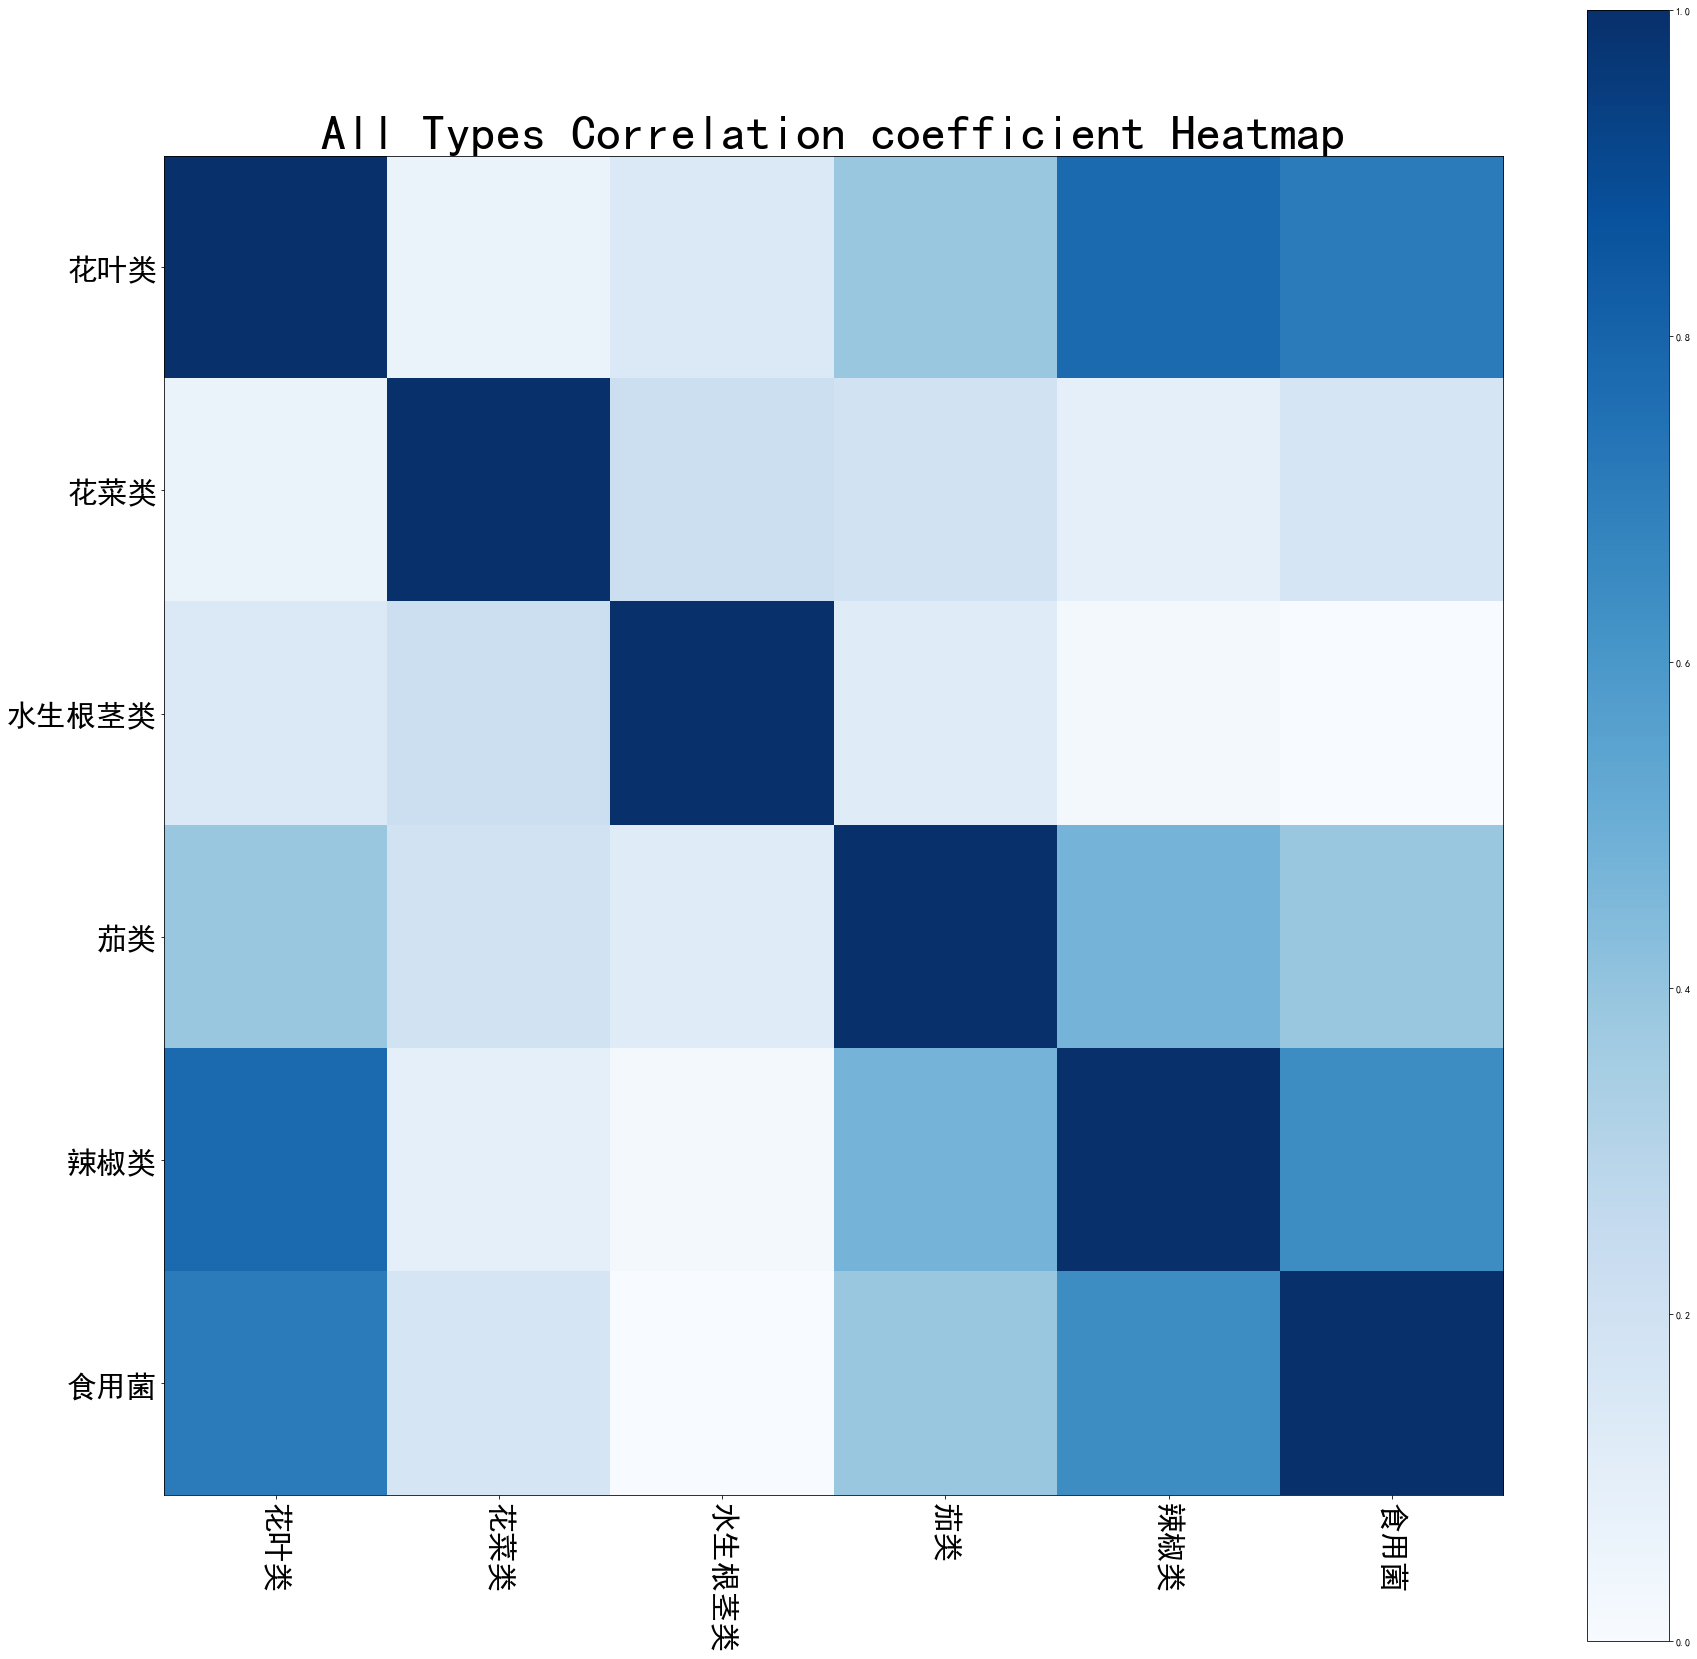

In [205]:
corr = df_sum.corr(method='pearson')
corr = np.absolute(corr)
corr.to_csv('../data/corr/'+'AllTypesCorr.csv',sep=',',encoding='utf_8_sig')
from matplotlib import cm
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
cmap = cm.Blues
fig = plt.figure(figsize=(30,30))
ax=fig.add_subplot(111)
map = ax.imshow(corr, interpolation='nearest', cmap=cmap, vmin=0, vmax=1)
plt.title('All Types Correlation coefficient Heatmap', fontsize= 50)
ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)
ax.set_xticks(range(len(corr)))
ax.set_xticklabels(corr.columns)
plt.xticks(rotation=270, fontsize= 30)
plt.yticks(fontsize= 30)
plt.colorbar(map)
plt.savefig('../data/corr/'+'AllTypesCorr.jpg')
plt.show()